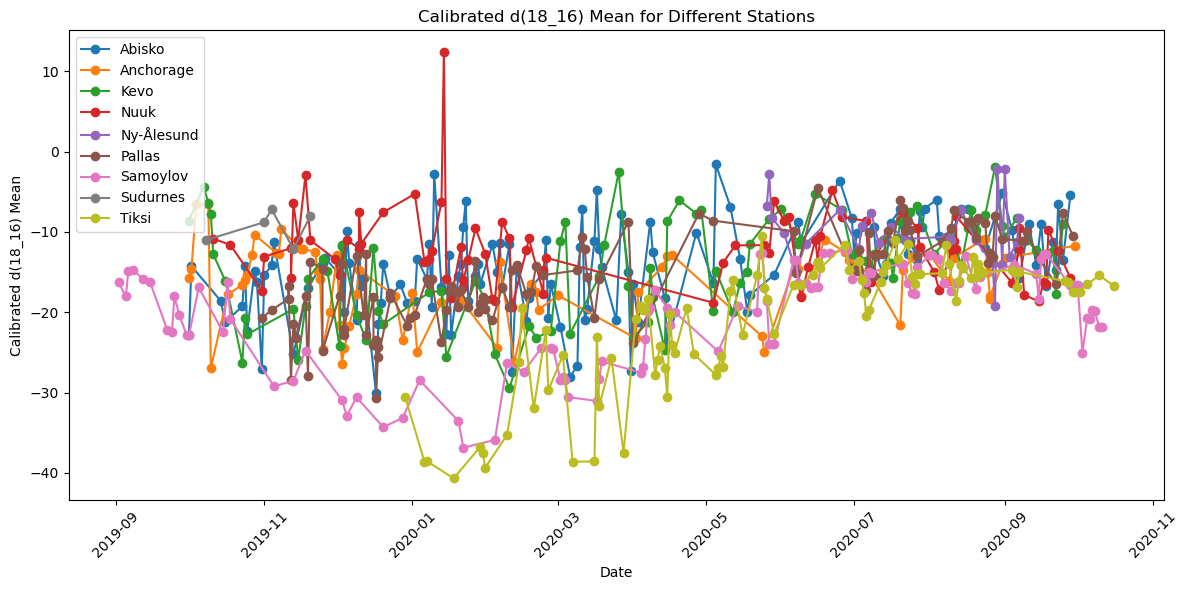

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"

# List of sheet names
sheet_names = ["Pallas", "Kevo", "Abisko", "Ny-Ålesund", "Nuuk", "Sudurnes", "Samoylov", "Tiksi", "Anchorage"]

# Read data from each sheet and store it in a list
dfs = []
for sheet_name in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # Add a new column for station name
    df['Station'] = sheet_name
    dfs.append(df)

# Concatenate all dataframes into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)

# Plot all stations on the same plot with different colors
plt.figure(figsize=(12, 6))
for station, data in combined_df.groupby('Station'):
    plt.plot(data["Date"], data["Calibrated d(18_16) Mean"], marker='o', linestyle='-', label=station)

plt.title("Calibrated d(18_16) Mean for Different Stations")
plt.xlabel("Date")
plt.ylabel("Calibrated d(18_16) Mean")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



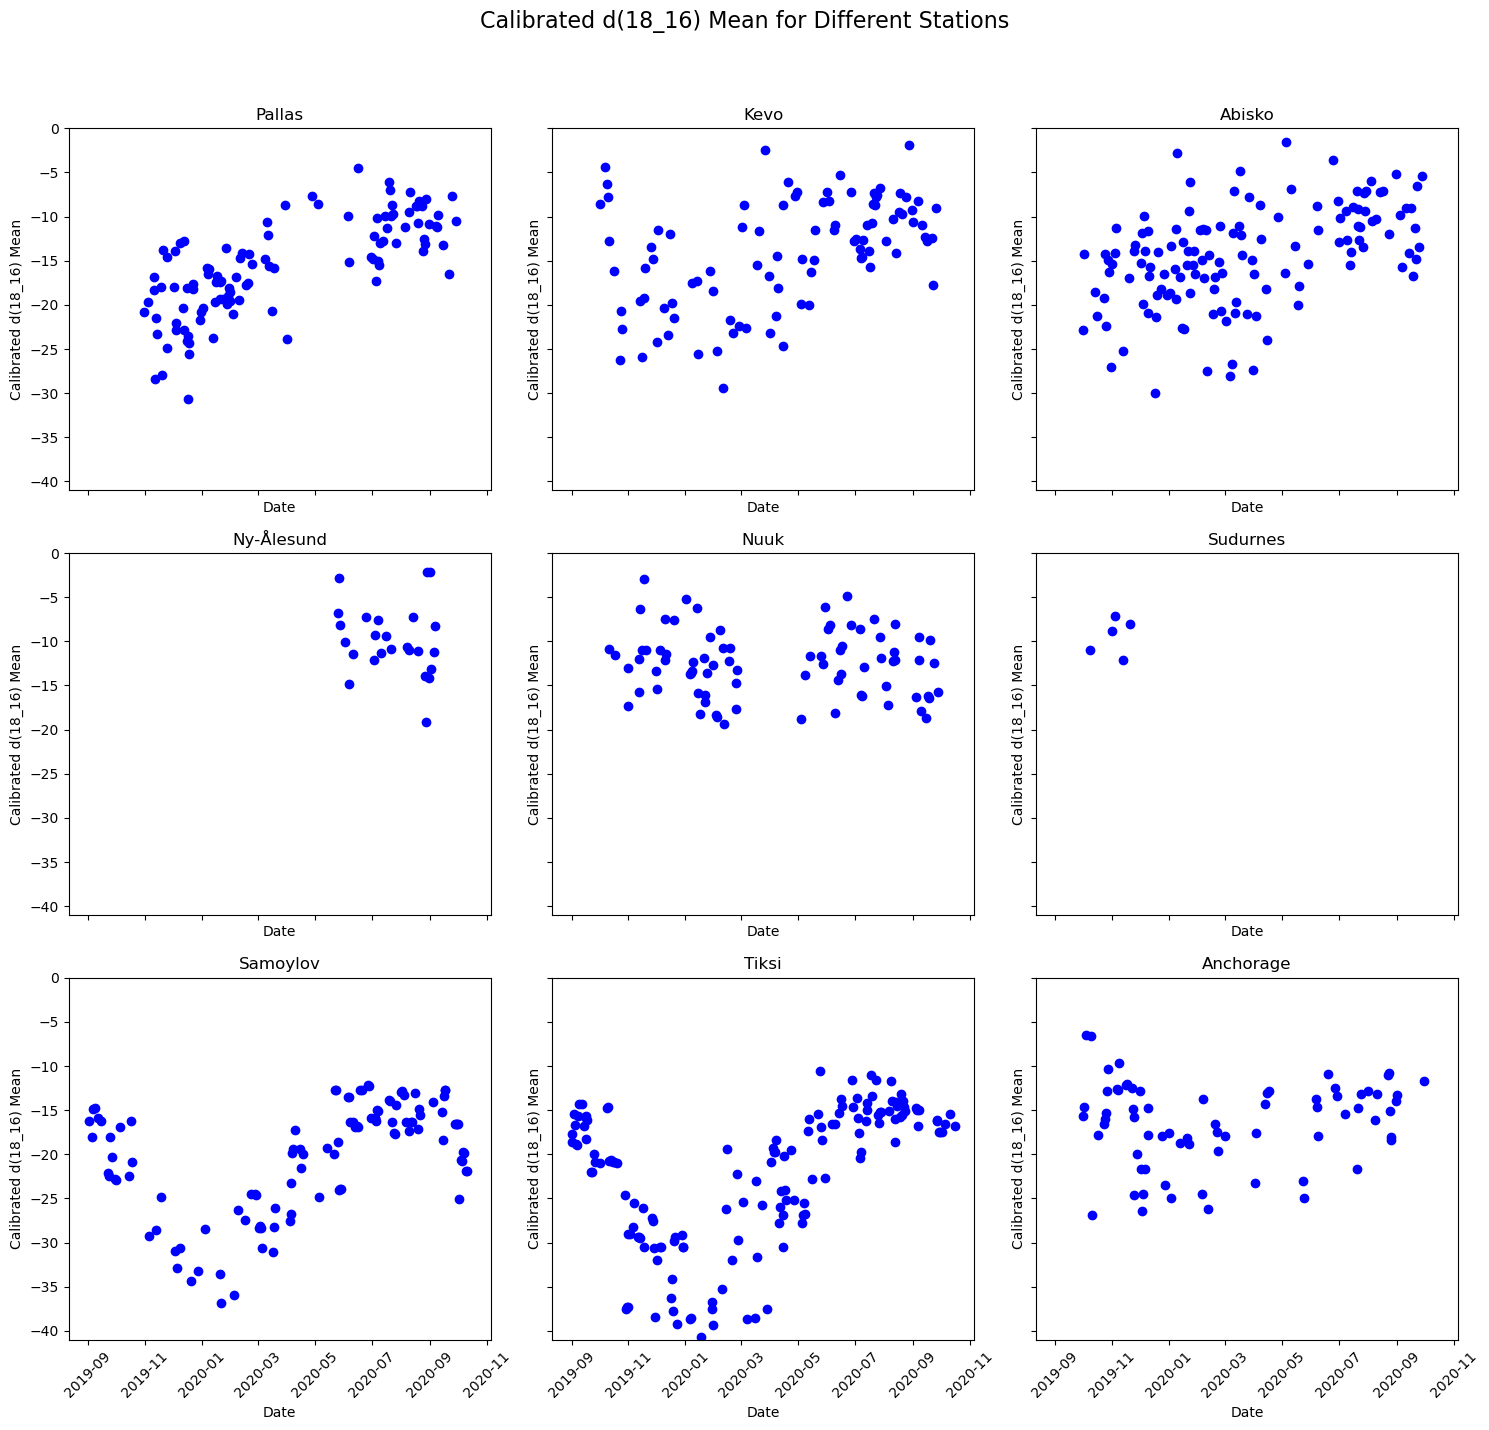

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File path
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"

# Output directory for saving the plots
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# List of sheet names
sheet_names = ["Pallas", "Kevo", "Abisko", "Ny-Ålesund", "Nuuk", "Sudurnes", "Samoylov", "Tiksi", "Anchorage"]

# Read data from each sheet and store it in a list
dfs = []
for sheet_name in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # Add a new column for station name
    df['Station'] = sheet_name
    dfs.append(df)

# Plot each station on a separate subplot in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("Calibrated d(18_16) Mean for Different Stations", fontsize=16)

# Set y-axis limits for Calibrated d(18_16) Mean
y_min, y_max = -41, 0

for i, (ax, station) in enumerate(zip(axs.flat, sheet_names)):
    data = pd.concat([df for df in dfs if (df['Station'] == station).any()])
    ax.plot(data["Date"], data["Calibrated d(18_16) Mean"], marker='o', linestyle='', color='b')
    ax.set_title(station)
    ax.set_xlabel("Date")
    ax.set_ylabel("Calibrated d(18_16) Mean")
    ax.set_ylim(y_min, y_max)  # Set y-axis limits
    ax.tick_params(axis='x', rotation=45)

# Hide empty subplots if the number of stations is less than 9
for i in range(len(sheet_names), len(axs.flat)):
    axs.flat[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as JPEG without lines between points
output_file_path = os.path.join(output_directory, "Calibrated_d(18_16)_Mean.jpg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

plt.show()


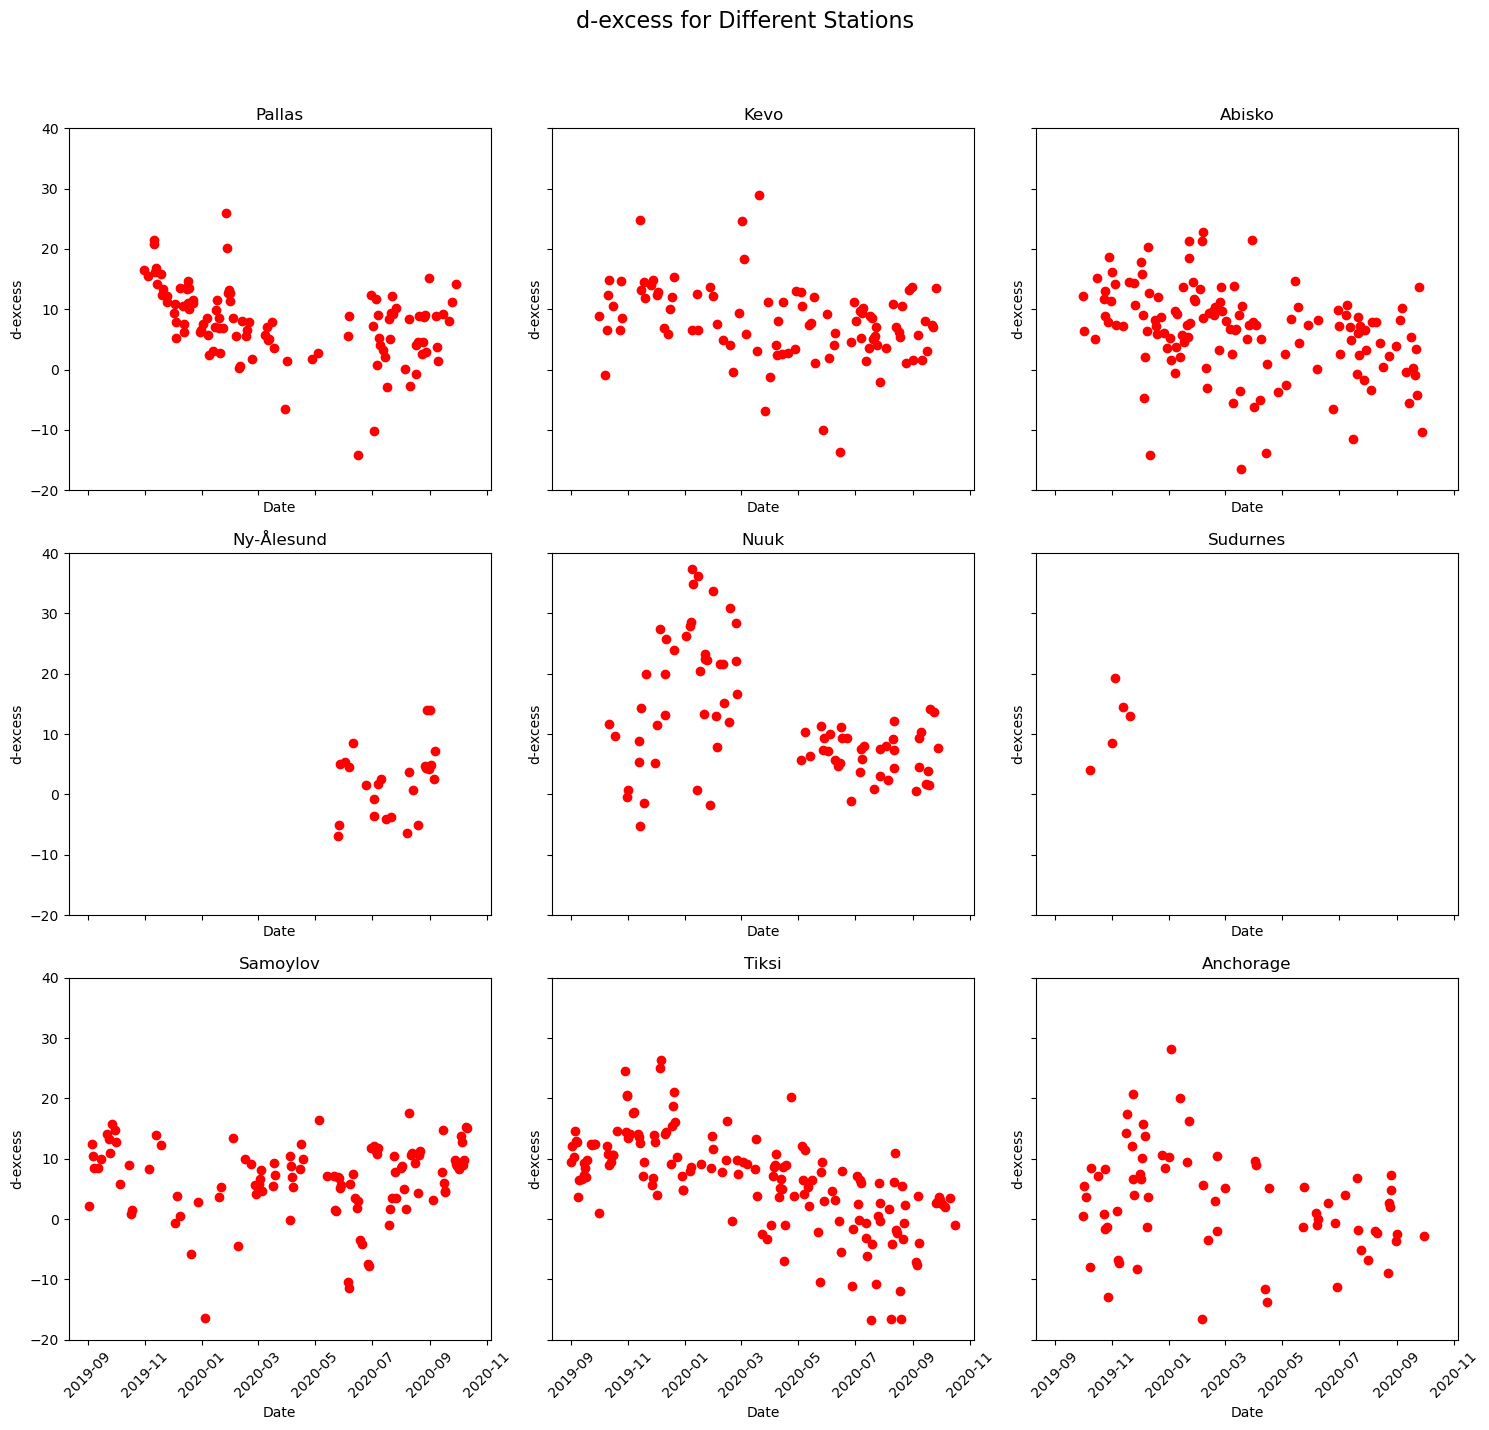

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File path
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"

# Output directory for saving the plots
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# List of sheet names
sheet_names = ["Pallas", "Kevo", "Abisko", "Ny-Ålesund", "Nuuk", "Sudurnes", "Samoylov", "Tiksi", "Anchorage"]

# Read data from each sheet and store it in a list
dfs = []
for sheet_name in sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # Add a new column for station name
    df['Station'] = sheet_name
    dfs.append(df)

# Plot each station on a separate subplot in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("d-excess for Different Stations", fontsize=16)

# Set y-axis limits for d-excess
y_min, y_max = -20, 40

for i, (ax, station) in enumerate(zip(axs.flat, sheet_names)):
    data = pd.concat([df for df in dfs if (df['Station'] == station).any()])
    ax.plot(data["Date"], data["d-excess"], marker='o', linestyle='', color='r')
    ax.set_title(station)
    ax.set_xlabel("Date")
    ax.set_ylabel("d-excess")
    ax.set_ylim(y_min, y_max)  # Set y-axis limits
    ax.tick_params(axis='x', rotation=45)

# Hide empty subplots if the number of stations is less than 9
for i in range(len(sheet_names), len(axs.flat)):
    axs.flat[i].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as JPEG without lines between points
output_file_path = os.path.join(output_directory, "d-excess.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

plt.show()


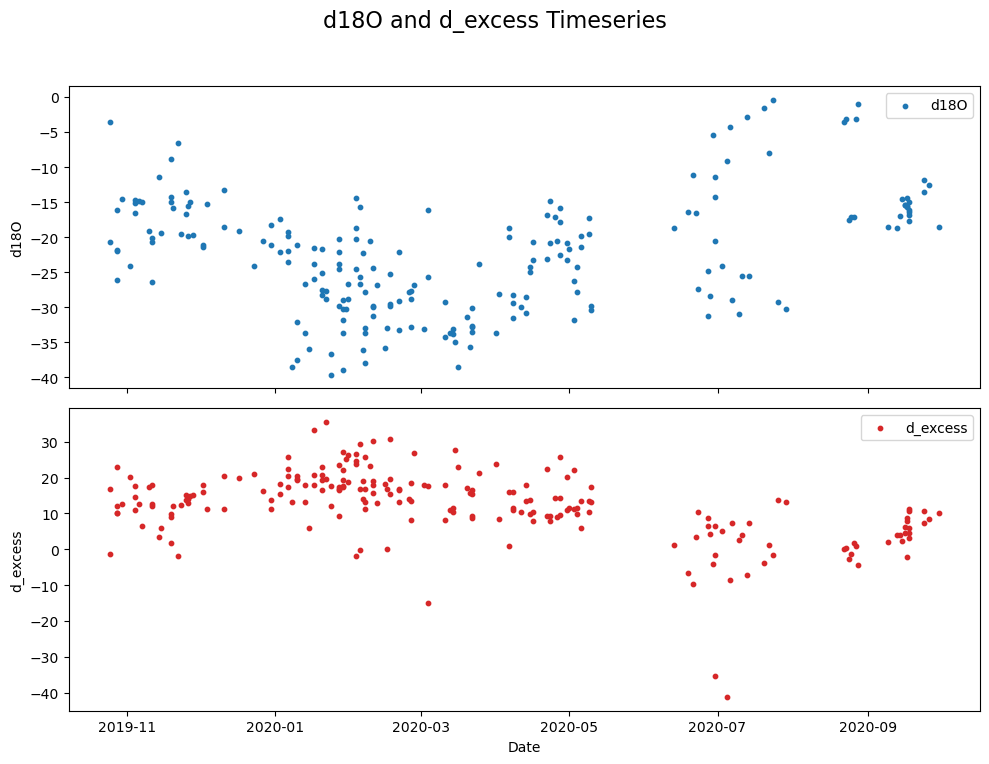

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# File path
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\CiASOM_SLF_Corrected.xlsx"

# Output directory for saving the plots
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# Read data from the Excel file (Sheet: Surface_Snow)
df = pd.read_excel(file_path, sheet_name="Surface_Snow")

# Extract columns for d18O and d-excess (renamed to d_excess)
dates = pd.to_datetime(df["Date"])
d18O = df["d18O"]
d_excess = df["d_excess"]

# Create two subplots stacked vertically
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle("d18O and d_excess Timeseries", fontsize=16)

# Plot d18O on the first subplot (ax1)
ax1.set_ylabel("d18O")
ax1.scatter(dates, d18O, color='tab:blue', label='d18O', marker='o', s=10)
ax1.legend()

# Plot d_excess on the second subplot (ax2)
ax2.set_xlabel("Date")
ax2.set_ylabel("d_excess")
ax2.scatter(dates, d_excess, color='tab:red', label='d_excess', marker='o', s=10)
ax2.legend()

# Adjust layout and show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure as JPEG without lines between points
output_file_path = os.path.join(output_directory, "MOSAiC_surface.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')


plt.show()


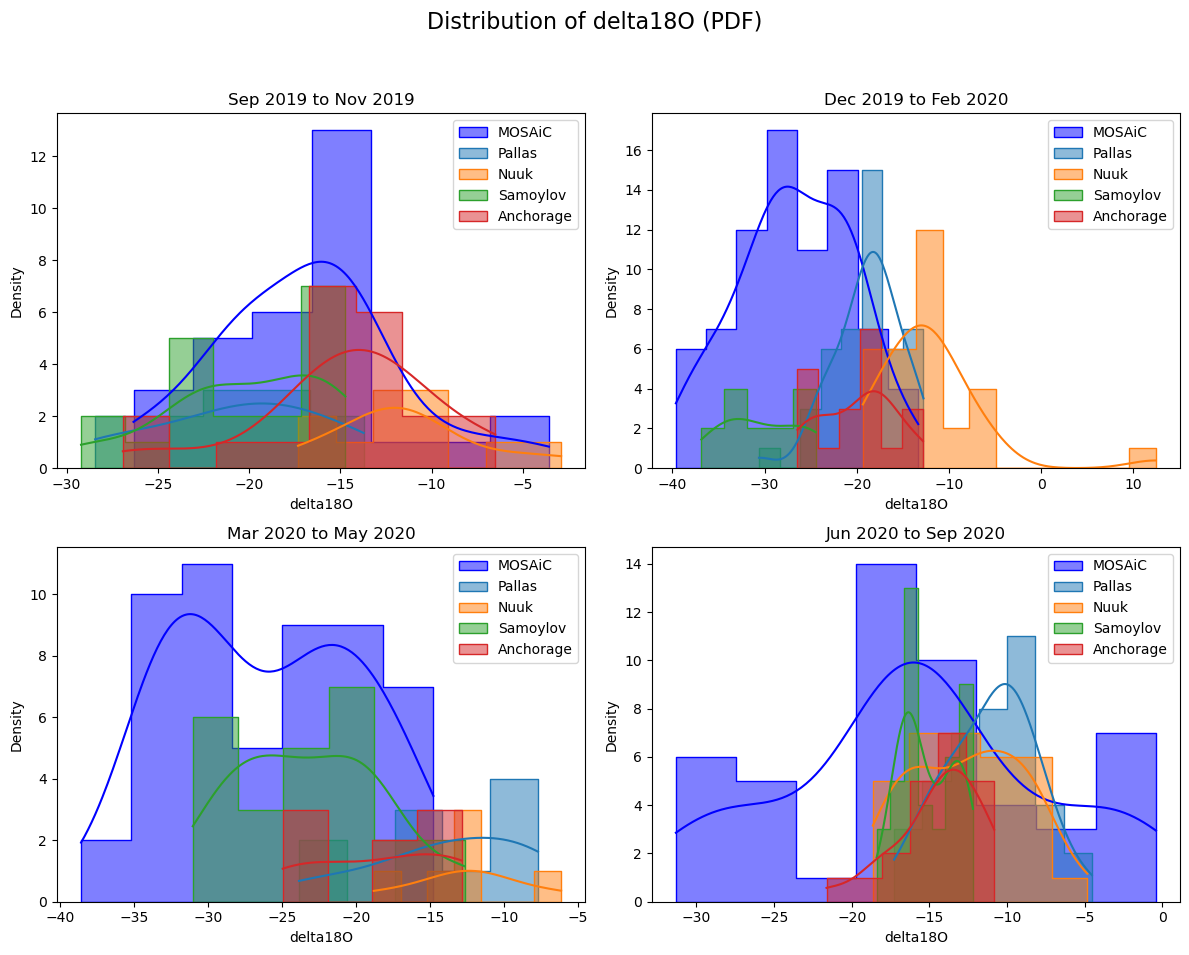

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
precipitation_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"
surface_snow_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\CiASOM_SLF_Corrected.xlsx"

# Read "delta18O" data from both files for selected stations
selected_stations = ["Pallas", "Nuuk", "Samoylov", "Anchorage"]
precipitation_df = pd.read_excel(precipitation_file_path, sheet_name=selected_stations)
surface_snow_df = pd.read_excel(surface_snow_file_path, sheet_name="Surface_Snow")

# Rename "Surface_Snow" to "MOSAiC"
surface_snow_df.rename(columns={"d18O": "delta18O"}, inplace=True)

# Define time ranges
time_ranges = {
    "Sep 2019 to Nov 2019": ("2019-09-01", "2019-11-30"),
    "Dec 2019 to Feb 2020": ("2019-12-01", "2020-02-29"),
    "Mar 2020 to May 2020": ("2020-03-01", "2020-05-31"),
    "Jun 2020 to Sep 2020": ("2020-06-01", "2020-09-30")
}

# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Distribution of delta18O (PDF)", fontsize=16)

# Iterate through time ranges and plot PDFs for selected stations
for i, (time_range, (start_date, end_date)) in enumerate(time_ranges.items()):
    # Filter "MOSAiC" data based on the time range
    mosaic_filtered = surface_snow_df.loc[(surface_snow_df["Date"] >= start_date) & (surface_snow_df["Date"] <= end_date)]
    
    # Plot "MOSAiC" data as a PDF plot
    sns.histplot(data=mosaic_filtered, x="delta18O", kde=True, color='b', label="MOSAiC", element="step", common_norm=False, ax=axs[i // 2, i % 2])
    
    # Plot precipitation station data for the same time range
    for station, station_data in precipitation_df.items():
        station_name = "MOSAiC" if station == "Surface_Snow" else station
        station_filtered = station_data.loc[(station_data["Date"] >= start_date) & (station_data["Date"] <= end_date)]
        sns.histplot(data=station_filtered, x="Calibrated d(18_16) Mean", kde=True, label=station_name, element="step", common_norm=False, ax=axs[i // 2, i % 2])

    axs[i // 2, i % 2].set_title(time_range)
    axs[i // 2, i % 2].set_xlabel("delta18O")
    axs[i // 2, i % 2].set_ylabel("Density")
    axs[i // 2, i % 2].legend()

# Adjust layout and save the figure as JPEG
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots\PDF_Distribution.jpg", dpi=300, bbox_inches='tight')
plt.show()


In [29]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


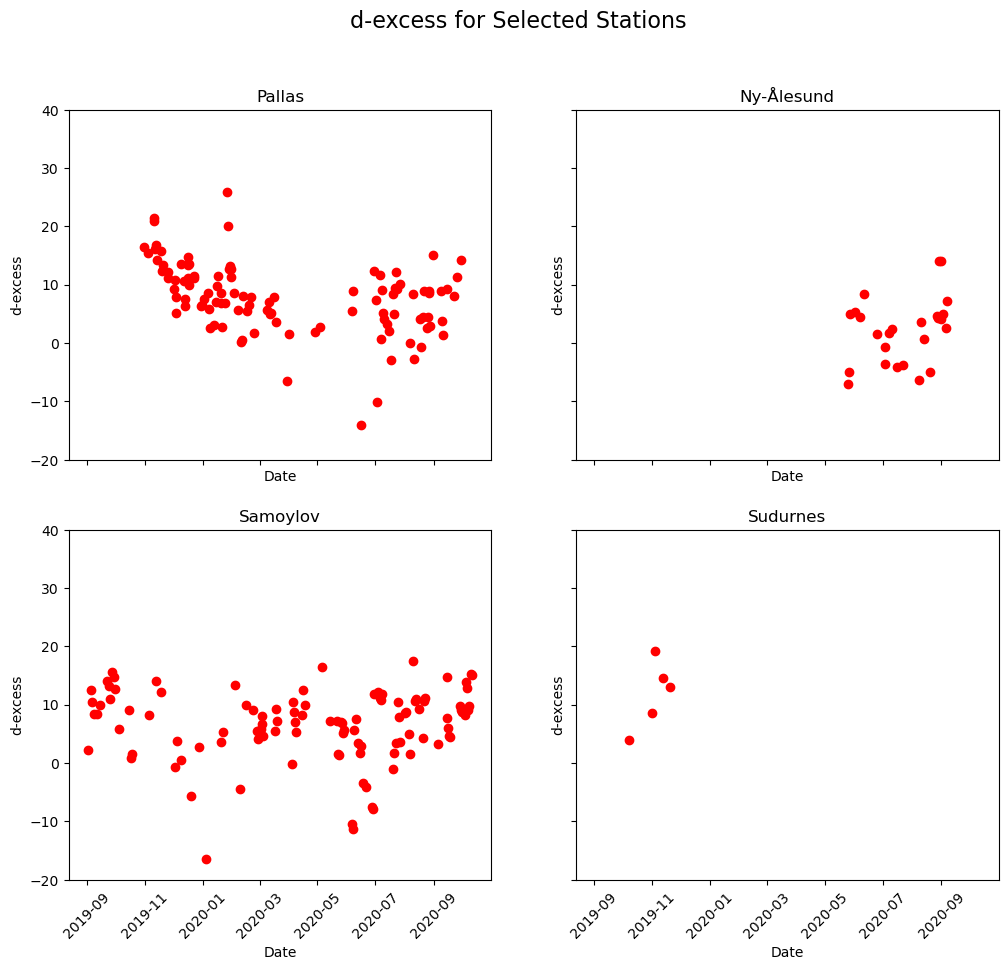

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File path
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"

# Output directory for saving the plots
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# List of selected sheet names
selected_sheet_names = ["Pallas", "Ny-Ålesund", "Samoylov", "Sudurnes"]

# Read data from selected sheets and store it in a list
dfs = []
for sheet_name in selected_sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # Add a new column for station name
    df['Station'] = sheet_name
    dfs.append(df)

# Plot each station on a separate subplot in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
fig.suptitle("d-excess for Selected Stations", fontsize=16)

# Set y-axis limits for d-excess
y_min, y_max = -20, 40

for i, (ax, station) in enumerate(zip(axs.flat, selected_sheet_names)):
    data = pd.concat([df for df in dfs if (df['Station'] == station).any()])
    ax.plot(data["Date"], data["d-excess"], marker='o', linestyle='', color='r')
    ax.set_title(station)
    ax.set_xlabel("Date")
    ax.set_ylabel("d-excess")
    ax.set_ylim(y_min, y_max)  # Set y-axis limits
    ax.tick_params(axis='x', rotation=45)

# Save the figure as JPEG without lines between points
output_file_path = os.path.join(output_directory, "selected_d-excess.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

plt.show()


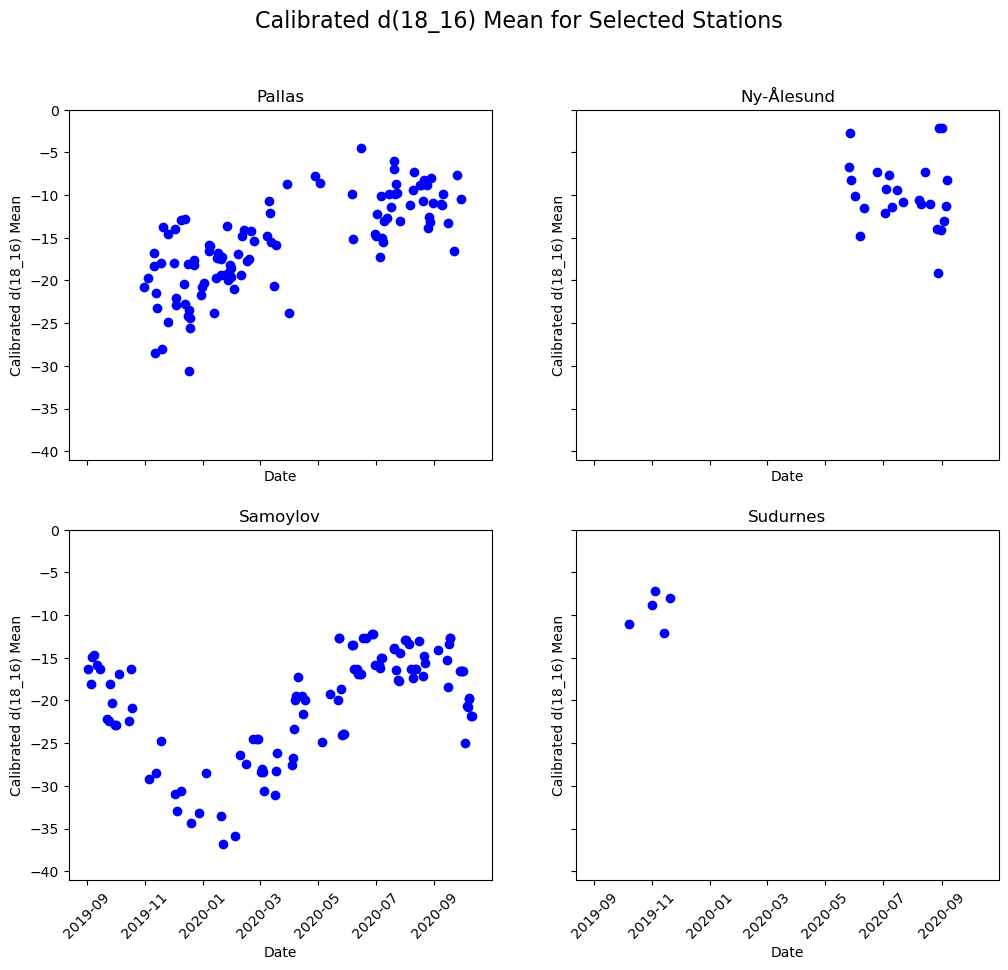

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File path
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"

# Output directory for saving the plots
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# List of selected sheet names
selected_sheet_names = ["Pallas", "Ny-Ålesund", "Samoylov", "Sudurnes"]

# Read data from selected sheets and store it in a list
dfs = []
for sheet_name in selected_sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # Add a new column for station name
    df['Station'] = sheet_name
    dfs.append(df)

# Plot each station on a separate subplot in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
fig.suptitle("Calibrated d(18_16) Mean for Selected Stations", fontsize=16)

# Set y-axis limits for Calibrated d(18_16) Mean
y_min, y_max = -41, 0

for i, (ax, station) in enumerate(zip(axs.flat, selected_sheet_names)):
    data = pd.concat([df for df in dfs if (df['Station'] == station).any()])
    ax.plot(data["Date"], data["Calibrated d(18_16) Mean"], marker='o', linestyle='', color='b')
    ax.set_title(station)
    ax.set_xlabel("Date")
    ax.set_ylabel("Calibrated d(18_16) Mean")
    ax.set_ylim(y_min, y_max)  # Set y-axis limits
    ax.tick_params(axis='x', rotation=45)

# Save the figure as JPEG without lines between points
output_file_path = os.path.join(output_directory, "selected_Calibrated d(18_16) Mean.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

plt.show()


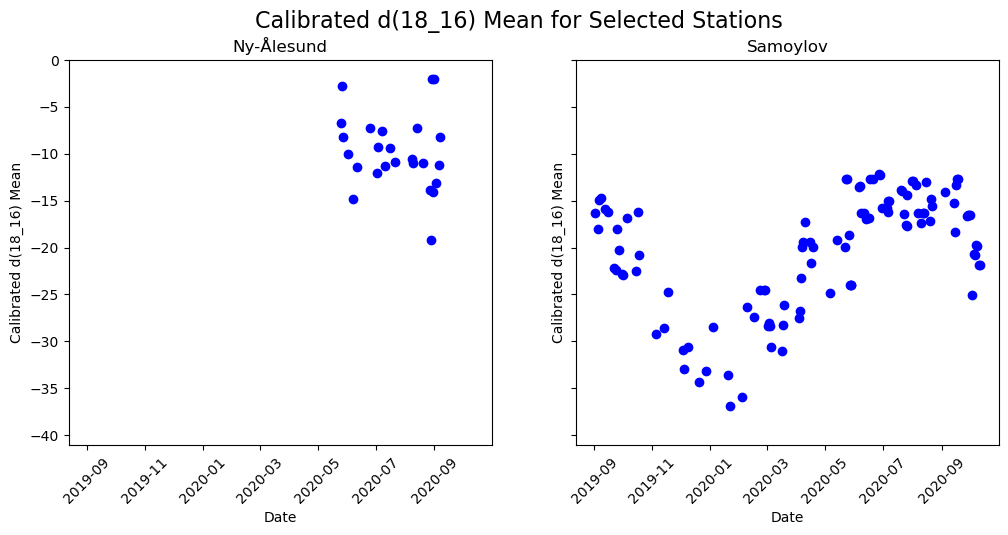

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File path
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"

# Output directory for saving the plots
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# List of selected sheet names
selected_sheet_names = ["Ny-Ålesund", "Samoylov"]

# Read data from selected sheets and store it in a list
dfs = []
for sheet_name in selected_sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # Add a new column for station name
    df['Station'] = sheet_name
    dfs.append(df)

# Plot each station on a separate subplot in a 2x2 grid
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
fig.suptitle("Calibrated d(18_16) Mean for Selected Stations", fontsize=16)

# Set y-axis limits for Calibrated d(18_16) Mean
y_min, y_max = -41, 0

for i, (ax, station) in enumerate(zip(axs.flat, selected_sheet_names)):
    data = pd.concat([df for df in dfs if (df['Station'] == station).any()])
    ax.plot(data["Date"], data["Calibrated d(18_16) Mean"], marker='o', linestyle='', color='b')
    ax.set_title(station)
    ax.set_xlabel("Date")
    ax.set_ylabel("δ¹⁸O (‰)")
    ax.set_ylim(y_min, y_max)  # Set y-axis limits
    ax.tick_params(axis='x', rotation=45)

# Save the figure as JPEG without lines between points
output_file_path = os.path.join(output_directory, "selected_Calibrated d(18_16) Mean_Samoylov_Ny.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

plt.show()

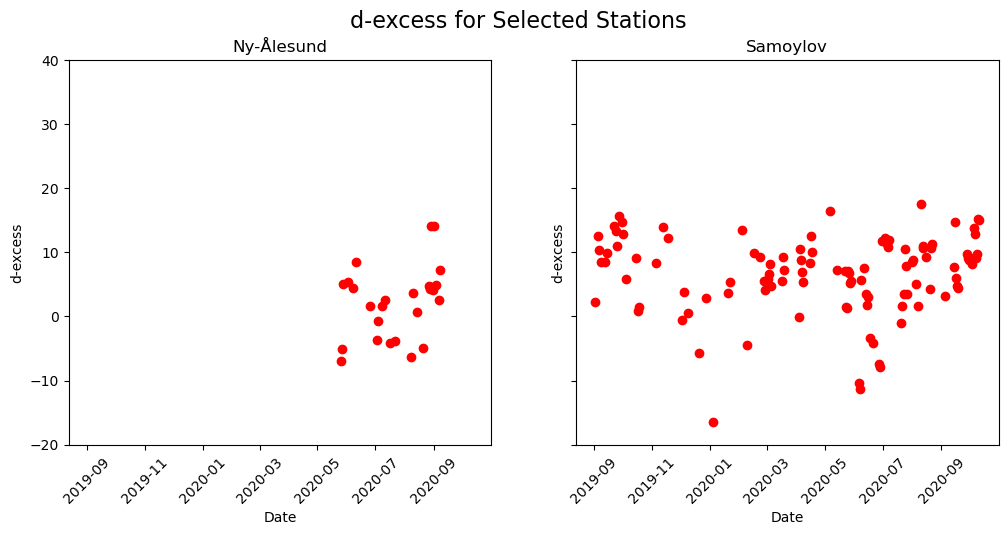

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File path
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"

# Output directory for saving the plots
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# List of selected sheet names
selected_sheet_names = ["Ny-Ålesund", "Samoylov"]

# Read data from selected sheets and store it in a list
dfs = []
for sheet_name in selected_sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # Add a new column for station name
    df['Station'] = sheet_name
    dfs.append(df)

# Plot each station on a separate subplot in a 2x2 grid
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)
fig.suptitle("d-excess for Selected Stations", fontsize=16)

# Set y-axis limits for Calibrated d(18_16) Mean
y_min, y_max = -20, 40

for i, (ax, station) in enumerate(zip(axs.flat, selected_sheet_names)):
    data = pd.concat([df for df in dfs if (df['Station'] == station).any()])
    ax.plot(data["Date"], data["d-excess"], marker='o', linestyle='', color='r')
    ax.set_title(station)
    ax.set_xlabel("Date")
    ax.set_ylabel("d-excess")
    ax.set_ylim(y_min, y_max)  # Set y-axis limits
    ax.tick_params(axis='x', rotation=45)

# Save the figure as JPEG without lines between points
output_file_path = os.path.join(output_directory, "selected_Samoylov_Ny_dex.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

plt.show()

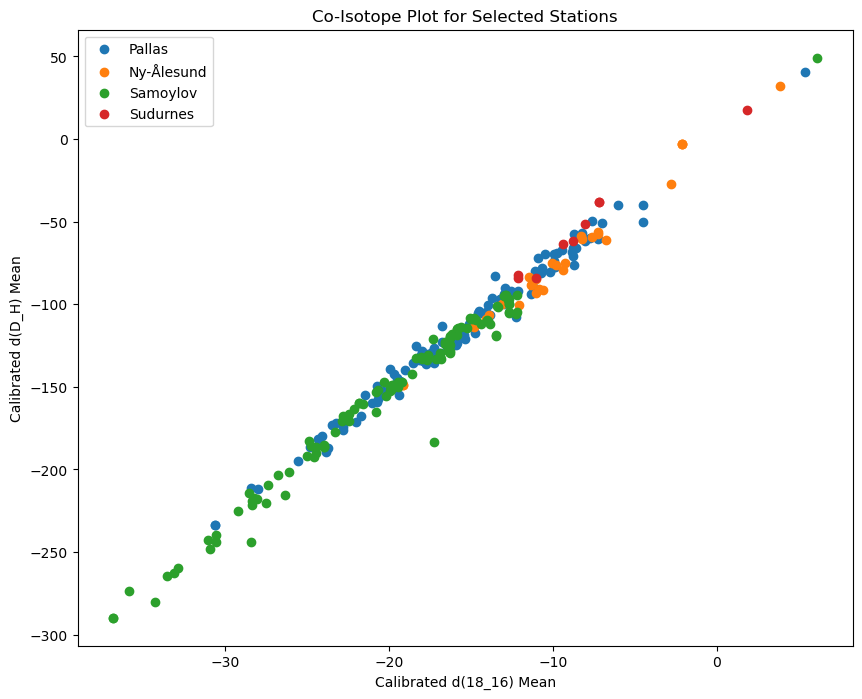

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File path
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"

# Output directory for saving the plot
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# List of selected sheet names
selected_sheet_names = ["Pallas", "Ny-Ålesund", "Samoylov", "Sudurnes"]

# Read data from selected sheets and store it in a list
dfs = []
for sheet_name in selected_sheet_names:
    df = pd.read_excel(file_path, sheet_name=sheet_name)
    # Add a new column for station name
    df['Station'] = sheet_name
    dfs.append(df)

# Combine dataframes into a single dataframe
combined_df = pd.concat(dfs)

# Create a scatter plot
plt.figure(figsize=(10, 8))
for station in selected_sheet_names:
    station_data = combined_df[combined_df['Station'] == station]
    plt.scatter(station_data["Calibrated d(18_16) Mean"], station_data["Calibrated d(D_H) Mean"], label=station)

# Set labels and title
plt.xlabel("Calibrated d(18_16) Mean")
plt.ylabel("Calibrated d(D_H) Mean")
plt.title("Co-Isotope Plot for Selected Stations")

# Add legend
plt.legend()

# Save the plot as JPEG
output_file_path = os.path.join(output_directory, "co_isotope_plot.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


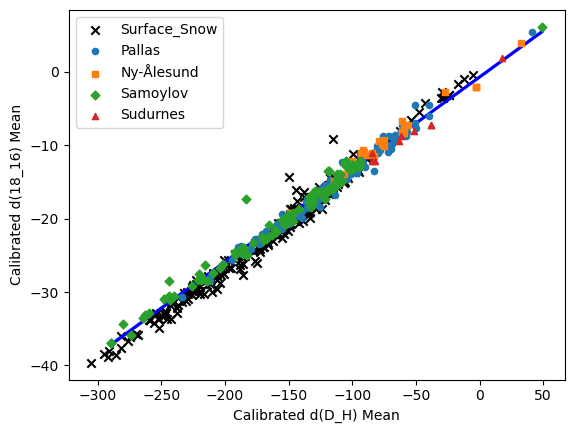

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

# File paths
co_isotope_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"
surface_snow_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\CiASOM_SLF_Corrected.xlsx"

# Output directory for saving the plot
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# List of selected sheet names for co-isotope plot
selected_sheet_names = ["Pallas", "Ny-Ålesund", "Samoylov", "Sudurnes"]

# Read data from selected sheets (co-isotope plot)
co_isotope_dfs = []
for sheet_name in selected_sheet_names:
    df = pd.read_excel(co_isotope_file_path, sheet_name=sheet_name)
    df['Station'] = sheet_name
    co_isotope_dfs.append(df)

# Combine dataframes for co-isotope plot
co_isotope_combined_df = pd.concat(co_isotope_dfs)

# Read data from the new dataset (Surface_Snow sheet)
surface_snow_df = pd.read_excel(surface_snow_file_path, sheet_name="Surface_Snow")

# Create a scatter plot for Surface_Snow data (color-coded as black)
plt.scatter(surface_snow_df["dD"], surface_snow_df["d18O"], color='black', label="Surface_Snow", zorder=2, marker='x')

# Create a scatter plot for co-isotope data
markers = ['o', 's', 'D', '^']  # Unique markers for each station
for i, station in enumerate(selected_sheet_names):
    station_data = co_isotope_combined_df[co_isotope_combined_df['Station'] == station]
    plt.scatter(station_data["Calibrated d(D_H) Mean"], station_data["Calibrated d(18_16) Mean"],
                label=station, s=20, zorder=3, marker=markers[i])

# Set labels and remove title
plt.xlabel("δ2H")
plt.ylabel("δ18O")

# Add legend
plt.legend()

# Draw a regression line for co-isotope data
sns.regplot(x="Calibrated d(D_H) Mean", y="Calibrated d(18_16) Mean", data=co_isotope_combined_df, scatter=False, color='blue')

# Save the plot as JPEG
output_file_path = os.path.join(output_directory, "co_isotope_plot_with_surface_snow_updated.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


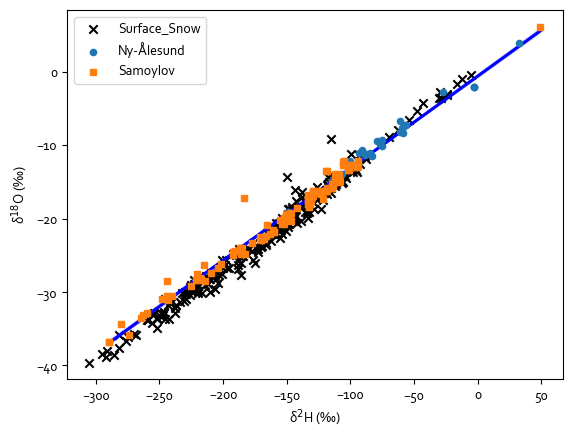

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import numpy as np

# File paths
co_isotope_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"
surface_snow_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Data\CiASOM_SLF_Corrected.xlsx"

# Output directory for saving the plot
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# List of selected sheet names for co-isotope plot
selected_sheet_names = ["Ny-Ålesund", "Samoylov"]

# Read data from selected sheets (co-isotope plot)
co_isotope_dfs = []
for sheet_name in selected_sheet_names:
    df = pd.read_excel(co_isotope_file_path, sheet_name=sheet_name)
    df['Station'] = sheet_name
    co_isotope_dfs.append(df)

# Combine dataframes for co-isotope plot
co_isotope_combined_df = pd.concat(co_isotope_dfs)

# Read data from the new dataset (Surface_Snow sheet)
surface_snow_df = pd.read_excel(surface_snow_file_path, sheet_name="Surface_Snow")

# Create a scatter plot for Surface_Snow data (color-coded as black)
plt.scatter(surface_snow_df["dD"], surface_snow_df["d18O"], color='black', label="Surface_Snow", zorder=2, marker='x')

# Create a scatter plot for co-isotope data
markers = ['o', 's']  # Unique markers for each station (reduced to 2)
for i, station in enumerate(selected_sheet_names):
    station_data = co_isotope_combined_df[co_isotope_combined_df['Station'] == station]
    plt.scatter(station_data["Calibrated d(D_H) Mean"], station_data["Calibrated d(18_16) Mean"],
                label=station, s=20, zorder=3, marker=markers[i])
    
# Draw a regression line for co-isotope data
sns.regplot(x="Calibrated d(D_H) Mean", y="Calibrated d(18_16) Mean", data=co_isotope_combined_df, scatter=False, color='blue')

# Set ticks font
plt.xticks(fontname='Corbel', fontsize=10)
plt.yticks(fontname='Corbel', fontsize=10)

# Set axis labels
plt.xlabel('δ$^{2}$H (‰)', fontname='Corbel', fontsize=10)
plt.ylabel('δ$^{18}$O (‰)', fontname='Corbel', fontsize=10)

# Add legend
plt.legend(prop={'family': 'Corbel', 'size': 10})

# Save the plot as JPEG
output_file_path = os.path.join(output_directory, "co_isotope_plot_with_surface_snow_updated.jpeg")
plt.savefig(output_file_path, dpi=600, bbox_inches='tight')

# Show the plot
plt.show()

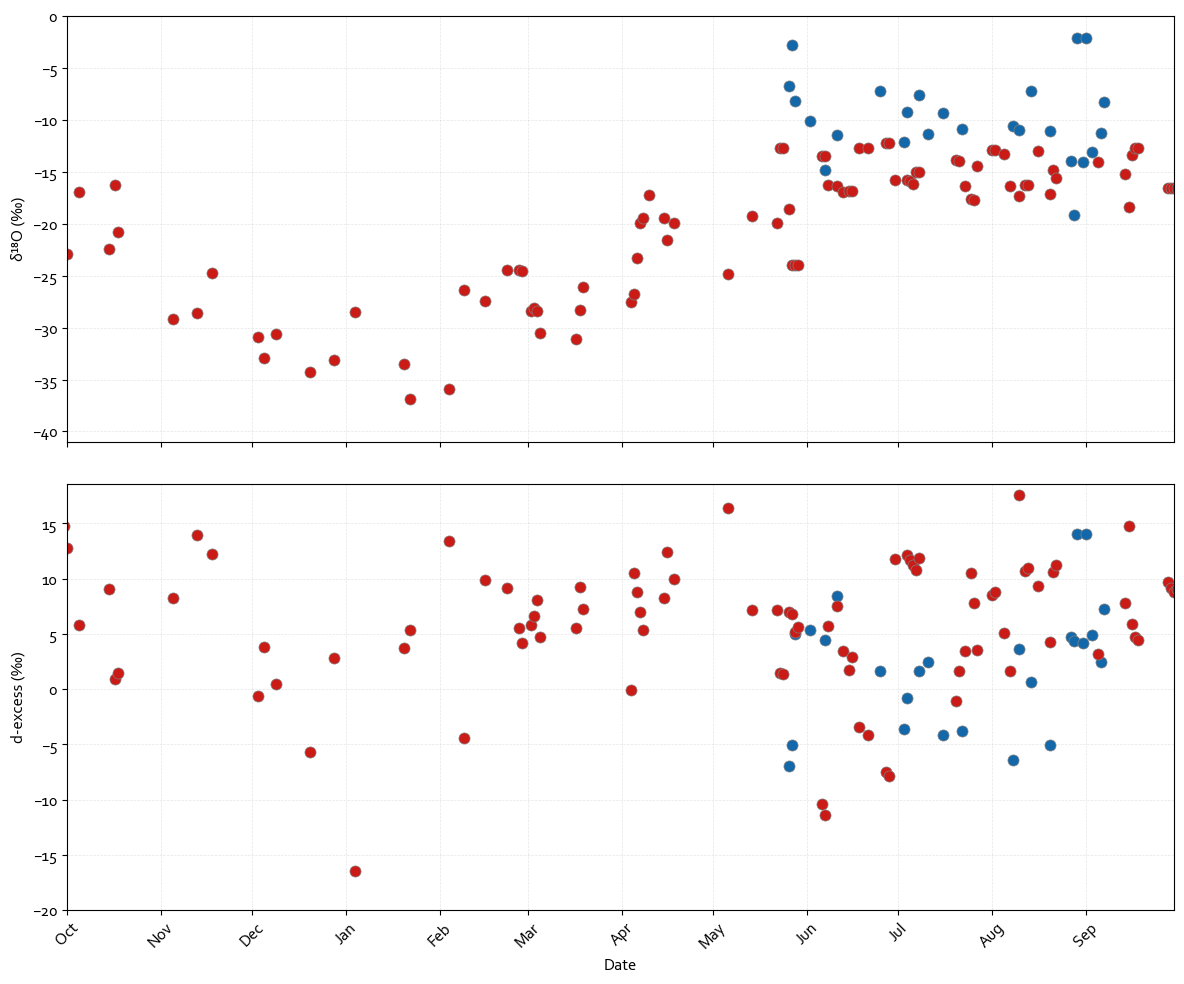

In [23]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set font and size globally
plt.rcParams.update({'font.family': 'Corbel', 'font.size': 12})

# File path and output directory
file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# Sheet names and colors
sheet_names_colors = {"Ny-Ålesund": '#1368AA', "Samoylov": '#CB1B16'}

# Read and combine data from sheets
combined_df = pd.concat([pd.read_excel(file_path, sheet_name=name).assign(Station=name) 
                         for name in sheet_names_colors])

# Convert 'Date' column to datetime
combined_df['Date'] = pd.to_datetime(combined_df['Date'])

# Define date range for x-axis
date_range_start = pd.Timestamp('2019-10-01')
date_range_end = pd.Timestamp('2020-09-30')

# Plot settings
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
y_limits = {'ax1': (-41, 0), 'ax2': (-20, combined_df["d-excess"].max() + 1)}

# Plotting function
def plot_data(ax, y_label, value_column):
    for name, color in sheet_names_colors.items():
        station_data = combined_df[combined_df['Station'] == name]
        ax.plot(station_data["Date"], station_data[value_column], 
                marker='o', linestyle='', color=color, 
                markeredgecolor='grey', markeredgewidth=0.5, alpha=1, markersize=8, label=name)
    ax.set_ylabel(y_label)
    ax.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.set_xlim(date_range_start, date_range_end)
    ax.tick_params(axis='x', rotation=45)

# Plot data
plot_data(ax1, "δ¹⁸O (‰)", "Calibrated d(18_16) Mean")
plot_data(ax2, "d-excess (‰)", "d-excess")

# Set y-axis limits and x-axis title
ax1.set_ylim(*y_limits['ax1'])
ax2.set_ylim(*y_limits['ax2'])
ax2.set_xlabel("Date")  # Add x-axis title

# Adjust layout and save plot
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
output_file_path = os.path.join(output_directory, "combined_Calibrated d(18_16) Mean_d-excess_Samoylov_Ny.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')
plt.show()

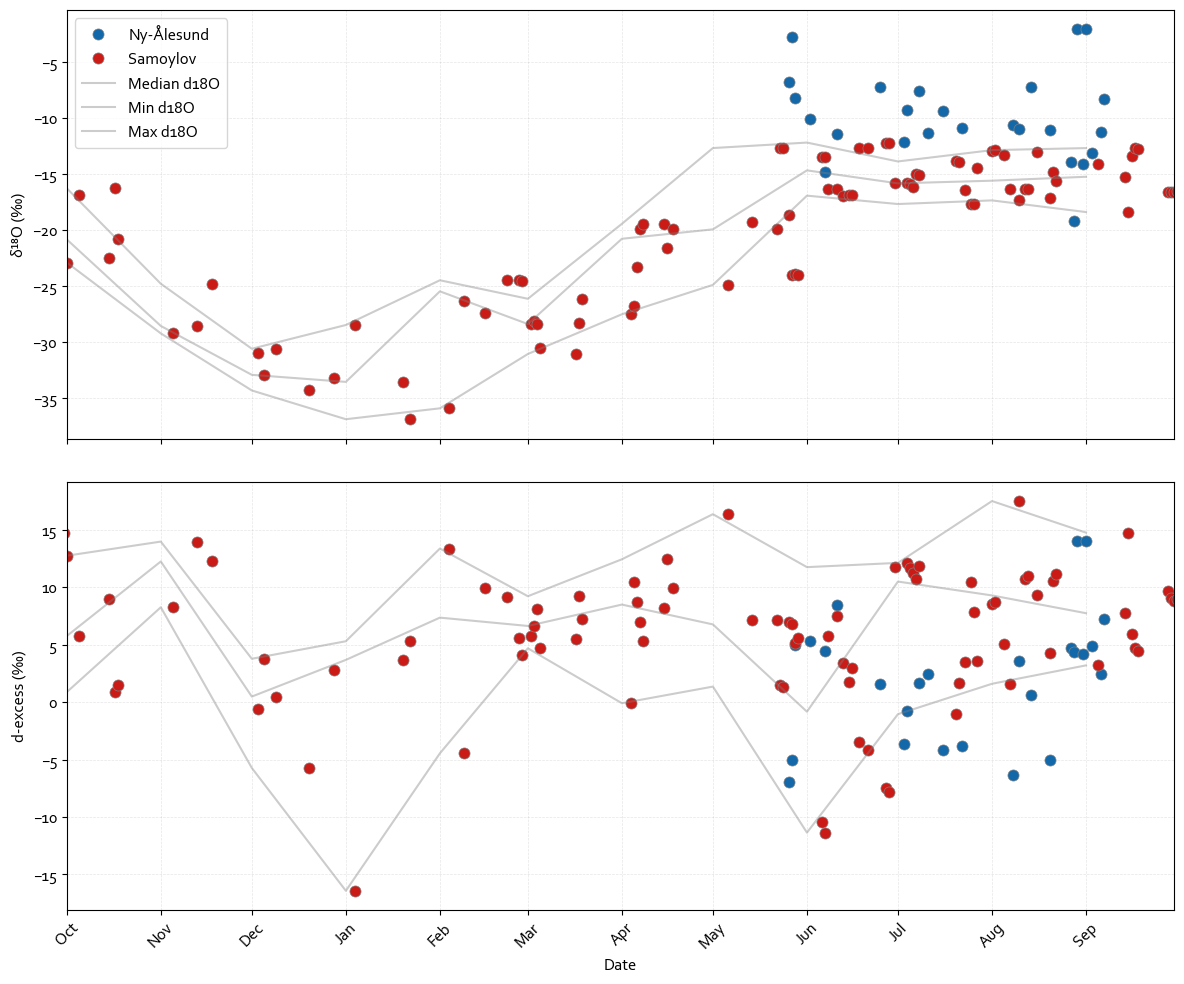

In [44]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set font and size globally
plt.rcParams.update({'font.family': 'Corbel', 'font.size': 12})

# File paths and output directory
original_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"
new_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\CiASOM_Comparison\Samoylov_Tiksi_fouryear_5.xlsx"
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# Sheet names and colors for the original dataset
sheet_names_colors = {"Ny-Ålesund": '#1368AA', "Samoylov": '#CB1B16'}

# Read and combine original dataset
original_df = pd.concat([pd.read_excel(original_file_path, sheet_name=name).assign(Station=name) 
                         for name in sheet_names_colors])

# Filter out d-excess values lower than -20 in original dataset
original_df = original_df[original_df['d-excess'] >= -20]

# Read the new dataset
new_df = pd.read_excel(new_file_path, sheet_name='Samoylov')
new_df['Date'] = pd.to_datetime(new_df['Date'])  # Convert 'Date' column to datetime

# Filter out d-excess values lower than -20 in new dataset
new_df = new_df[new_df['dex'] >= -20]

# Define date range for the x-axis
start_date = pd.Timestamp('2019-10-01')
end_date = pd.Timestamp('2020-09-30')
new_df = new_df[(new_df['Date'] >= start_date) & (new_df['Date'] <= end_date)]

# Calculate monthly statistics for the new dataset, excluding outliers
new_df['Month'] = new_df['Date'].dt.to_period('M')
monthly_stats = new_df.groupby('Month').agg({'d18O': ['median', 'min', 'max'], 'dex': ['median', 'min', 'max']})
monthly_stats.columns = monthly_stats.columns.map('_'.join)  # Flatten MultiIndex columns
monthly_stats = monthly_stats.reset_index()
monthly_stats['Month'] = monthly_stats['Month'].dt.to_timestamp()  # Convert PeriodIndex to Timestamps

## Plot settings
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
y_limits = {'ax1': (-41, 0), 'ax2': (-20, combined_df["d-excess"].max() + 1)}

# Plot data
plot_data(ax1, "δ¹⁸O (‰)", "Calibrated d(18_16) Mean")
plot_data(ax2, "d-excess (‰)", "d-excess")

# Plot new dataset statistics and individual points
plot_stats(ax1, monthly_stats, 'd18O')
plot_stats(ax2, monthly_stats, 'dex')
plot_individual_points(ax1, new_df, 'd18O')
plot_individual_points(ax2, new_df, 'dex')

# Plotting function
def plot_data(ax, y_label, value_column):
    for name, color in sheet_names_colors.items():
        station_data = combined_df[combined_df['Station'] == name]
        ax.plot(station_data["Date"], station_data[value_column], 
                marker='o', linestyle='', color=color, 
                markeredgecolor='grey', markeredgewidth=0.5, alpha=1, markersize=8, label=name)
    ax.set_ylabel(y_label)
    ax.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.set_xlim(date_range_start, date_range_end)
    ax.tick_params(axis='x', rotation=45)

# Set x-axis to date format and adjust labels
ax2.set_xlabel("Date")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Set x-axis limits
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)

# Adjust layout, add legends, and save plot
ax1.legend()
#ax2.legend()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
output_file_path = os.path.join(output_directory, "combined_d18O_dex_Samoylov_Ny_with_stats_no_outliers.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')
plt.show()


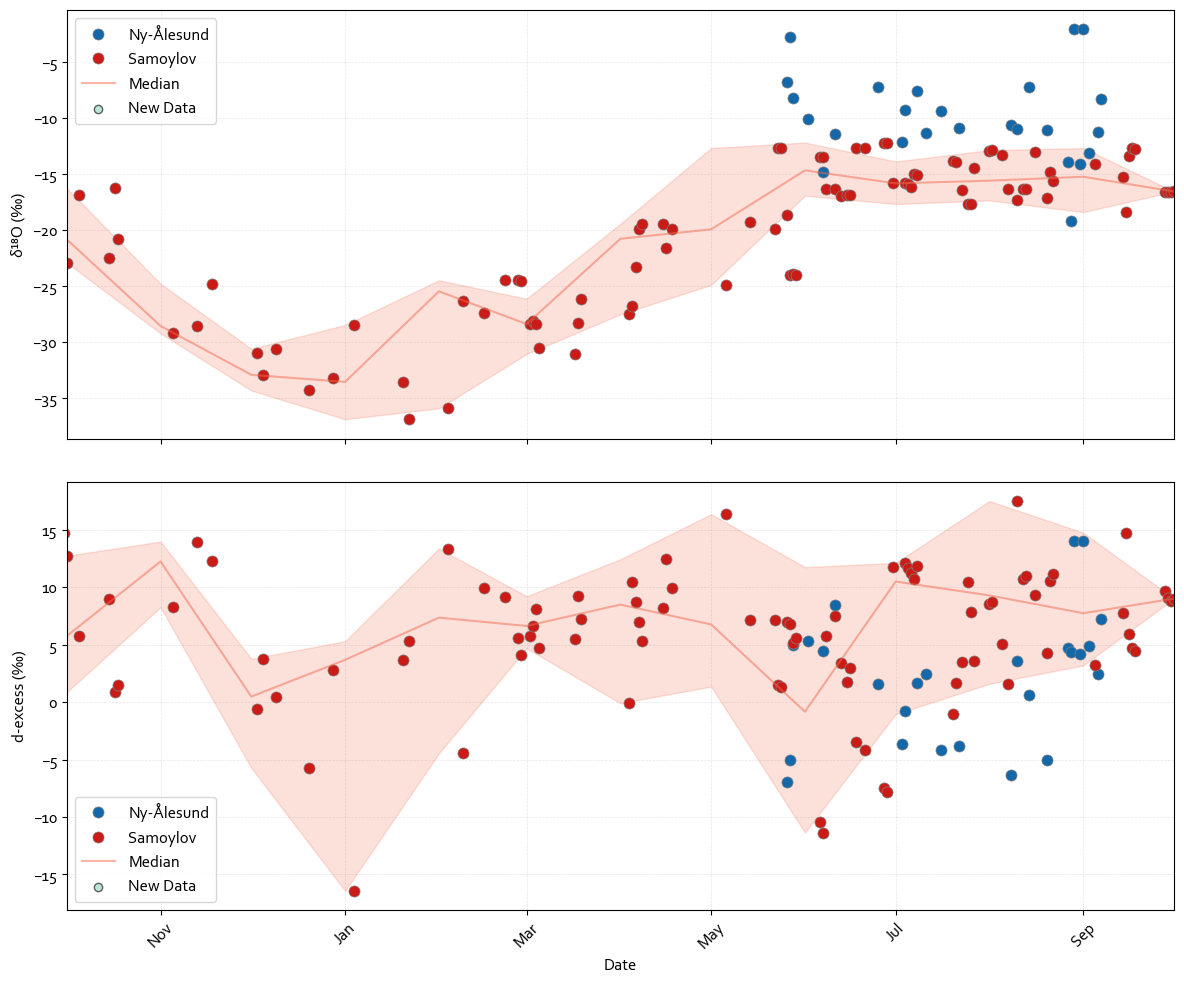

In [13]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import os

# Set font and size globally
plt.rcParams.update({'font.family': 'Corbel', 'font.size': 12})

# File paths and output directory
original_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"
new_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\CiASOM_Comparison\Samoylov_Tiksi_fouryear_5.xlsx"
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# Sheet names and colors for the original dataset
sheet_names_colors = {"Ny-Ålesund": '#1368AA', "Samoylov": '#CB1B16'}

# Read and combine original dataset
original_df = pd.concat([pd.read_excel(original_file_path, sheet_name=name).assign(Station=name) 
                         for name in sheet_names_colors])

# Filter out d-excess values lower than -20 in original dataset
original_df = original_df[original_df['d-excess'] >= -20]

# Read the new dataset
new_df = pd.read_excel(new_file_path, sheet_name='Samoylov')
new_df['Date'] = pd.to_datetime(new_df['Date'])  # Convert 'Date' column to datetime

# Filter out d-excess values lower than -20 in new dataset
new_df = new_df[new_df['dex'] >= -20]

# Define date range for the x-axis
start_date = pd.Timestamp('2019-10-01')
end_date = pd.Timestamp('2020-10-01')
new_df = new_df[(new_df['Date'] >= start_date) & (new_df['Date'] <= end_date)]

# Calculate monthly statistics for the new dataset, excluding outliers
new_df['Month'] = new_df['Date'].dt.to_period('M')
monthly_stats = new_df.groupby('Month').agg({'d18O': ['median', 'min', 'max'], 'dex': ['median', 'min', 'max']})
monthly_stats.columns = monthly_stats.columns.map('_'.join)  # Flatten MultiIndex columns
monthly_stats = monthly_stats.reset_index()
monthly_stats['Month'] = monthly_stats['Month'].dt.to_timestamp()  # Convert PeriodIndex to Timestamps

# Plot settings
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotting function for data
def plot_data(ax, df, y_label, value_column):
    for name, color in sheet_names_colors.items():
        station_data = df[df['Station'] == name]
        ax.plot(station_data["Date"], station_data[value_column], 
                marker='o', linestyle='', color=color, 
                markeredgecolor='grey', markeredgewidth=0.5, alpha=1, markersize=8, label=name)
    ax.set_ylabel(y_label)
    ax.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.set_xlim(start_date, end_date)
    ax.tick_params(axis='x', rotation=45)

# Plotting function for statistics (min, median, max)
def plot_stats(ax, stats_df, value_column_prefix):
    # Plotting the median line in grey with 50% transparency
    ax.plot(stats_df['Month'], stats_df[f'{value_column_prefix}_median'], color='#F26A4F', alpha=0.5, label='Median')
    # Filling between min and max values
    ax.fill_between(stats_df['Month'], stats_df[f'{value_column_prefix}_min'], stats_df[f'{value_column_prefix}_max'], color='#F26A4F', alpha=0.2)
    
# Plotting function for individual points
def plot_individual_points(ax, df, value_column):
    ax.scatter(df['Date'], df[value_column], color='#94D2BD', alpha=0.6, edgecolor='black', label='New Data')

# Plot data
plot_data(ax1, original_df, "δ¹⁸O (‰)", "Calibrated d(18_16) Mean")
plot_data(ax2, original_df, "d-excess (‰)", "d-excess")

# Plot new dataset statistics and individual points
plot_stats(ax1, monthly_stats, 'd18O')
plot_stats(ax2, monthly_stats, 'dex')
plot_individual_points(ax1, new_df, 'd18O')
plot_individual_points(ax2, new_df, 'dex')

# Set x-axis to date format and adjust labels
ax2.set_xlabel("Date")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout, add legends, and save plot
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
output_file_path = os.path.join(output_directory, "combined_d18O_dex_Samoylov_Ny_with_stats_no_outliers.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')
plt.show()

0   2014-06-25
1   2014-07-01
2   2014-07-02
3   2014-07-03
4   2014-07-04
Name: Date, dtype: datetime64[ns]


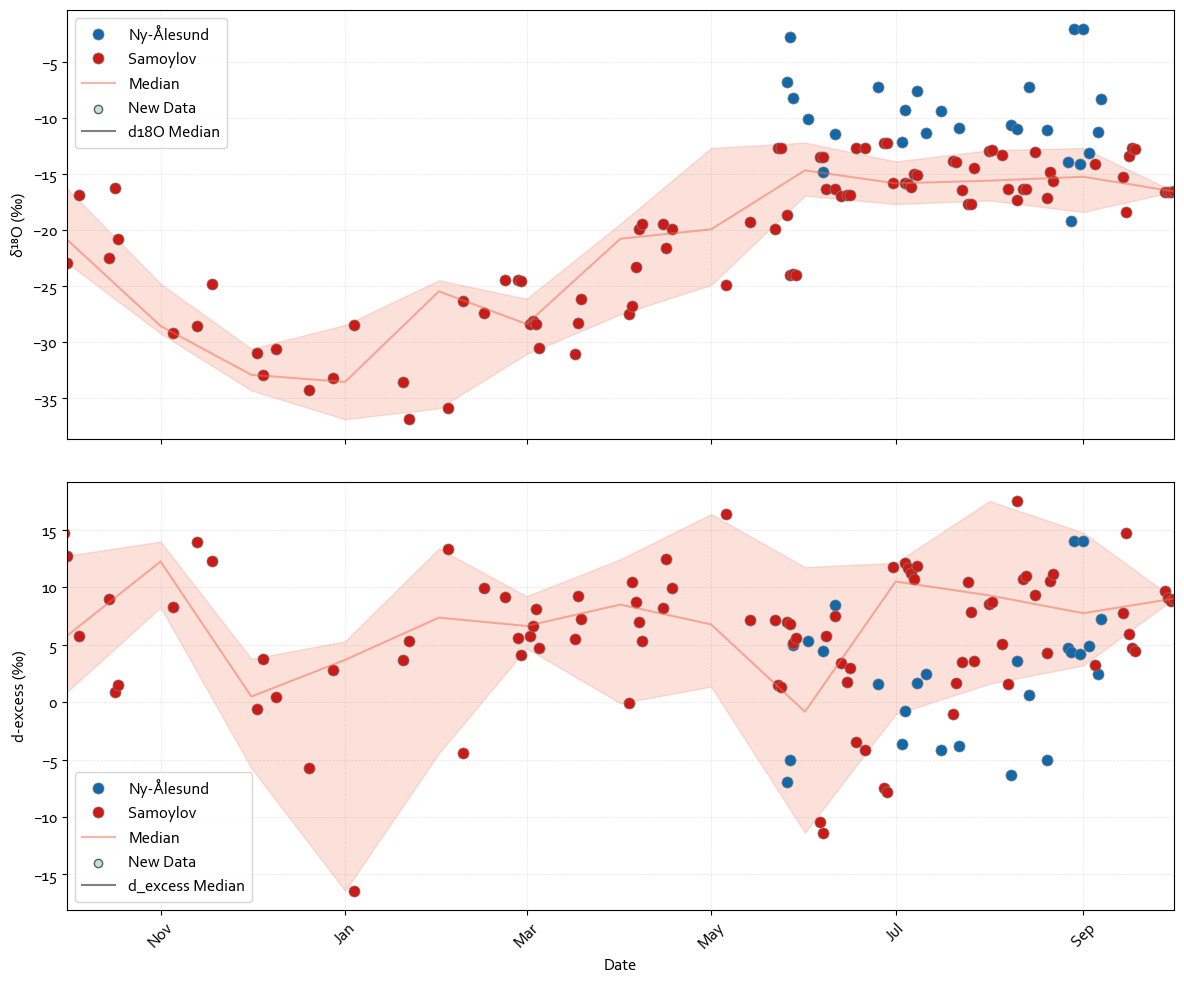

In [19]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime, timedelta

# Set font and size globally
plt.rcParams.update({'font.family': 'Corbel', 'font.size': 12})

# File paths and output directory
original_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\PAPIN_CiASOM.xlsx"
new_file_path = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\CiASOM_Comparison\Samoylov_Tiksi_fouryear_5.xlsx"
additional_data_path = r"C:\CiASOM\Data\Vapor Svalbard\CLDS_2020_iso_precip.dat"
output_directory = r"C:\CiASOM\PhD\07.Manuscripts\#2.Snow Surface\Precipitation_PAPIN\Plots"

# Sheet names and colors for the original dataset
sheet_names_colors = {"Ny-Ålesund": '#1368AA', "Samoylov": '#CB1B16'}

# Read and combine original dataset
original_df = pd.concat([pd.read_excel(original_file_path, sheet_name=name).assign(Station=name) 
                         for name in sheet_names_colors])

# Filter out d-excess values lower than -20 in original dataset
original_df = original_df[original_df['d-excess'] >= -20]

# Read the new dataset
new_df = pd.read_excel(new_file_path, sheet_name='Samoylov')
new_df['Date'] = pd.to_datetime(new_df['Date'])  # Convert 'Date' column to datetime

# Filter out d-excess values lower than -20 in new dataset
new_df = new_df[new_df['dex'] >= -20]

# Define date range for the x-axis
start_date = pd.Timestamp('2019-10-01')
end_date = pd.Timestamp('2020-10-01')
new_df = new_df[(new_df['Date'] >= start_date) & (new_df['Date'] <= end_date)]

# Calculate monthly statistics for the new dataset, excluding outliers
new_df['Month'] = new_df['Date'].dt.to_period('M')
monthly_stats = new_df.groupby('Month').agg({'d18O': ['median', 'min', 'max'], 'dex': ['median', 'min', 'max']})
monthly_stats.columns = monthly_stats.columns.map('_'.join)  # Flatten MultiIndex columns
monthly_stats = monthly_stats.reset_index()
monthly_stats['Month'] = monthly_stats['Month'].dt.to_timestamp()  # Convert PeriodIndex to Timestamps

# Read the additional data
precip_data = pd.read_csv(additional_data_path, delim_whitespace=True, header=None, names=['Date', 'Temperature_C', 'd18O', 'dD', 'PrecipType'])

# Convert Matlab date format to datetime
def matlab_to_datetime(matlab_datenum):
    try:
        python_datetime = datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days=366)
        return python_datetime
    except Exception as e:
        print(f"Error converting date: {matlab_datenum} - {e}")
        return pd.NaT
    
precip_data['Date'] = precip_data['Date'].apply(matlab_to_datetime)
print(precip_data['Date'].head())

precip_data = precip_data.dropna(subset=['Date'])

# Calculate d-excess for the new data
precip_data['d_excess'] = precip_data['dD'] - 8 * precip_data['d18O']

# Filter the data if necessary (e.g., based on date range)
precip_data = precip_data[(precip_data['Date'] >= start_date) & (precip_data['Date'] <= end_date)]

# Plot settings
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotting functions
def plot_data(ax, df, y_label, value_column):
    for name, color in sheet_names_colors.items():
        station_data = df[df['Station'] == name]
        ax.plot(station_data["Date"], station_data[value_column], 
                marker='o', linestyle='', color=color, 
                markeredgecolor='grey', markeredgewidth=0.5, alpha=1, markersize=8, label=name)
    ax.set_ylabel(y_label)
    ax.grid(True, linestyle='--', linewidth=0.5, color='grey', alpha=0.2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.set_xlim(start_date, end_date)
    ax.tick_params(axis='x', rotation=45)
    
# Calculate monthly statistics for precip_data
precip_data['Month'] = precip_data['Date'].dt.to_period('M')
monthly_precip_stats = precip_data.groupby('Month').agg({'d18O': ['median', 'min', 'max'], 'd_excess': ['median', 'min', 'max']})
monthly_precip_stats.columns = monthly_precip_stats.columns.map('_'.join)
monthly_precip_stats = monthly_precip_stats.reset_index()
monthly_precip_stats['Month'] = monthly_precip_stats['Month'].dt.to_timestamp()

# Function to plot statistics for additional data
def plot_additional_stats(ax, stats_df, value_column_prefix, color, alpha):
    ax.plot(stats_df['Month'], stats_df[f'{value_column_prefix}_median'], color=color, label=f'{value_column_prefix} Median')
    ax.fill_between(stats_df['Month'], stats_df[f'{value_column_prefix}_min'], stats_df[f'{value_column_prefix}_max'], color=color, alpha=alpha)

def plot_stats(ax, stats_df, value_column_prefix):
    ax.plot(stats_df['Month'], stats_df[f'{value_column_prefix}_median'], color='#F26A4F', alpha=0.5, label='Median')
    ax.fill_between(stats_df['Month'], stats_df[f'{value_column_prefix}_min'], stats_df[f'{value_column_prefix}_max'], color='#F26A4F', alpha=0.2)
    
def plot_individual_points(ax, df, value_column):
    ax.scatter(df['Date'], df[value_column], color='#94D2BD', alpha=0.6, edgecolor='black', label='New Data')

def plot_additional_data(ax, df, value_column, color, alpha, label):
    ax.scatter(df['Date'], df[value_column], color=color, alpha=alpha, edgecolor='black', label=label, marker='o')

# Plot data
plot_data(ax1, original_df, "δ¹⁸O (‰)", "Calibrated d(18_16) Mean")
plot_data(ax2, original_df, "d-excess (‰)", "d-excess")

# Plot new dataset statistics and individual points
plot_stats(ax1, monthly_stats, 'd18O')
plot_stats(ax2, monthly_stats, 'dex')
plot_individual_points(ax1, new_df, 'd18O')
plot_individual_points(ax2, new_df, 'dex')

# Plotting statistics for additional data
plot_additional_stats(ax1, monthly_precip_stats, 'd18O', 'grey', 0.2)
plot_additional_stats(ax2, monthly_precip_stats, 'd_excess', 'grey', 0.2)

# Set x-axis to date format and adjust labels
ax2.set_xlabel("Date")
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Adjust layout, add legends, and save plot
ax1.legend()
ax2.legend()
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)
output_file_path = os.path.join(output_directory, "combined_d18O_dex_Samoylov_Ny_with_stats_no_outliers.jpeg")
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')
plt.show()

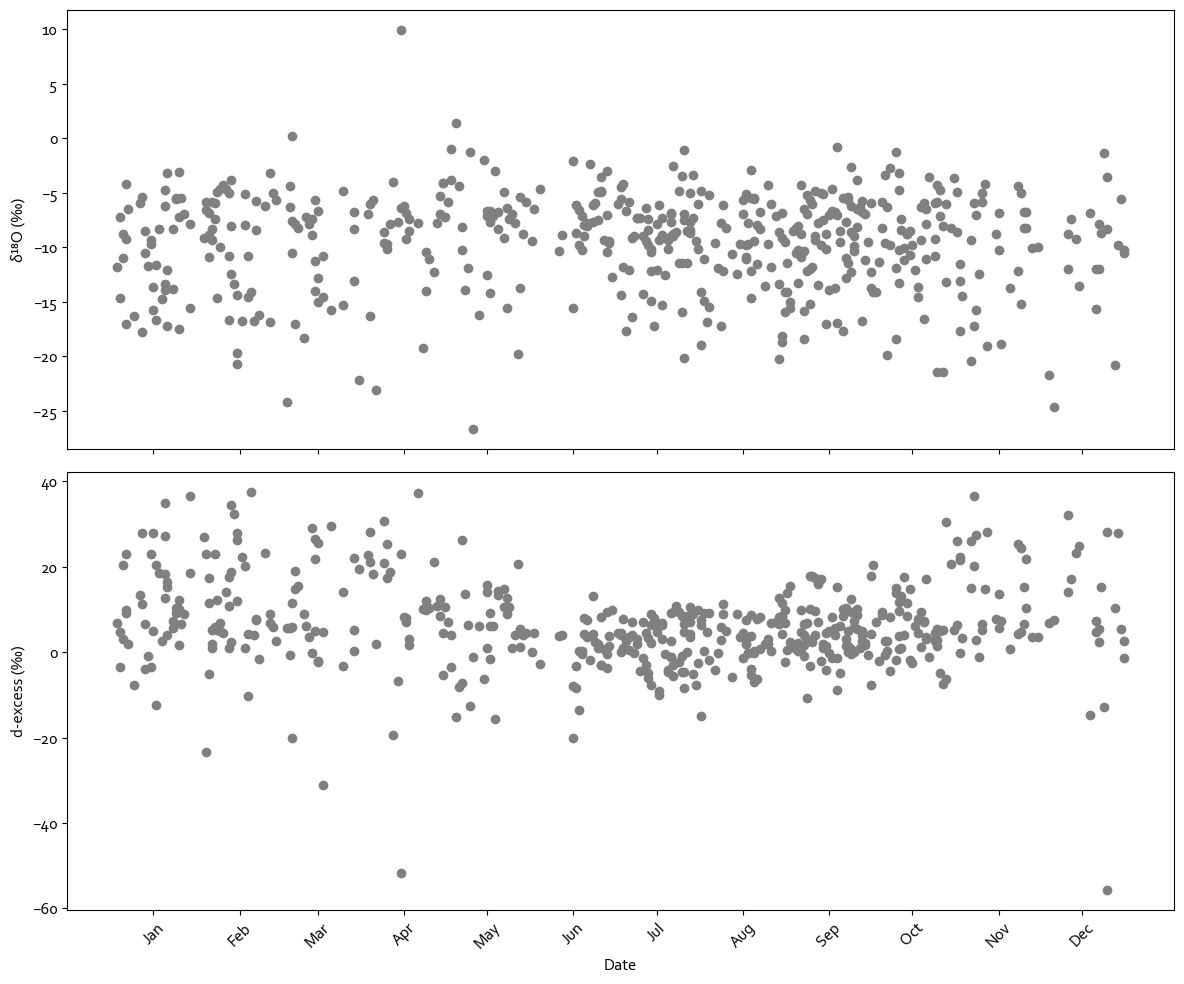

In [45]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar
import matplotlib

# Set the font to Corbel
matplotlib.rcParams['font.family'] = 'Corbel'

# Function to convert Matlab date format to datetime
def matlab_to_datetime(matlab_date):
    return datetime.fromordinal(int(matlab_date)) + timedelta(days=matlab_date % 1) - timedelta(days=366)

# Function to normalize year
def normalize_year(date):
    return date.replace(year=2019)

# Read the data
file_path = r"C:\CiASOM\Data\Vapor Svalbard\CLDS_2020_iso_precip.dat"
precip_data = pd.read_csv(file_path, delim_whitespace=True, header=None, 
                          names=['Date', 'Temperature_C', 'd18O', 'dD', 'PrecipType'])

# Convert Matlab date format to datetime and normalize year
precip_data['Date'] = precip_data['Date'].apply(matlab_to_datetime).apply(normalize_year)
precip_data['Month'] = precip_data['Date'].dt.month

# Calculate d-excess
precip_data['d_excess'] = precip_data['dD'] - 8 * precip_data['d18O']

# Custom sort order for months (October to September)
months_order = {month: (month - 10) % 12 for month in range(1, 13)}
precip_data['Month_Sort'] = precip_data['Month'].apply(lambda x: months_order[x])

# Normalize the month and year for plotting
precip_data['Normalized_Date'] = precip_data['Date'].apply(lambda x: x.replace(year=2019))

# Sort data by the custom month order
precip_data_sorted = precip_data.sort_values(by='Month_Sort')

# Create the subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot δ¹⁸O values and d-excess values
for month in sorted(months_order.keys(), key=lambda x: months_order[x]):
    monthly_data = precip_data_sorted[precip_data_sorted['Month'] == month]
    ax1.plot(monthly_data['Normalized_Date'], monthly_data['d18O'], marker='o', linestyle='', color='grey')
    ax2.plot(monthly_data['Normalized_Date'], monthly_data['d_excess'], marker='o', linestyle='', color='grey')

# Set labels and titles
ax1.set_ylabel("δ¹⁸O (‰)")
ax2.set_ylabel("d-excess (‰)")
ax2.set_xlabel("Date")

# Customize x-axis with month names and locations
x_ticks = [datetime(2019, month, 15) for month in sorted(months_order.keys(), key=lambda x: months_order[x])]
ax2.set_xticks(x_ticks)
ax2.set_xticklabels([calendar.month_abbr[month] for month in sorted(months_order.keys(), key=lambda x: months_order[x])], rotation=45)

plt.tight_layout()
plt.show()